In [1]:
pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import os
%matplotlib inline
sns.set_theme(color_codes=True, style='darkgrid', 
              palette='deep', font='sans-serif')

In [3]:
pip install gradio

     |████████████████████████████████| 659 kB 8.3 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 2.0 MB 38.3 MB/s 
     |████████████████████████████████| 255 kB 11.4 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 211 kB 40.7 MB/s 
     |████████████████████████████████| 1.1 MB 34.9 MB/s 
     |████████████████████████████████| 84 kB 2.1 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 40.7 MB/s 
     |████████████████████████████████| 271 kB 36.5 MB/s 
     |████████████████████████████████| 10.9 MB 40.8 MB/s 
     |████████████████████████████████| 58 kB 3.0 MB/s 
     |████████████████████████████████| 79 kB 6.9 MB/s 
     |████████████████████████████████| 43 kB 801 kB/s 
     |████████████████████████████████| 61 kB 426 kB/s 
     |████████████████████████████████| 3.6 MB 34.8 MB/s 
     |████████████████████████

In [4]:
import gradio as gr

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df=pd.read_csv('gdrive/My Drive/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## EXPLORATORY DATA ANALYSIS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [10]:
df.shape

(309, 16)

In [11]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [12]:
df.duplicated().sum()

33

In [13]:
df = df.drop_duplicates()

In [14]:
corr = df.corr()
corr

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767


In [15]:
df["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [16]:
print ('Total Healthy Patients : {} '.format(df.LUNG_CANCER.value_counts()['NO']))
print ('Total Suspected Patients : {} '.format(df.LUNG_CANCER.value_counts()['YES']))

Total Healthy Patients : 38 
Total Suspected Patients : 238 


In [17]:
df["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [18]:
df['GENDER'].value_counts()

M    142
F    134
Name: GENDER, dtype: int64

## VISUALISATION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


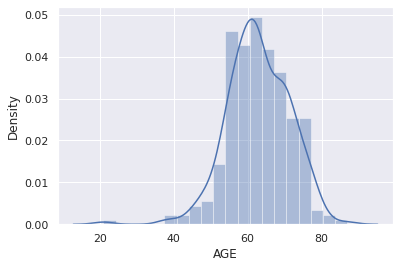

In [19]:
sns.distplot(a=df["AGE"])


In [20]:
fig = px.histogram(df, x="AGE", color = 'GENDER')
fig.show()

In [21]:
fig = px.histogram(df, x="GENDER",
             height=400, color_discrete_sequence=['darkslateblue'])
fig.show()

In [22]:
fig = px.histogram(df, x="LUNG_CANCER",
             height=400, color_discrete_sequence=['indianred'])
fig.show()

In [23]:
fig = px.pie(df, names='LUNG_CANCER',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [24]:
fig = px.histogram(df, x="GENDER",
             color='LUNG_CANCER', barmode='group',
             height=400)
fig.show()

In [25]:
df.replace({"LUNG_CANCER":{'YES':1,'NO':0}},inplace=True)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [26]:
df.replace({"GENDER":{'M':1,'F':0}},inplace=True)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

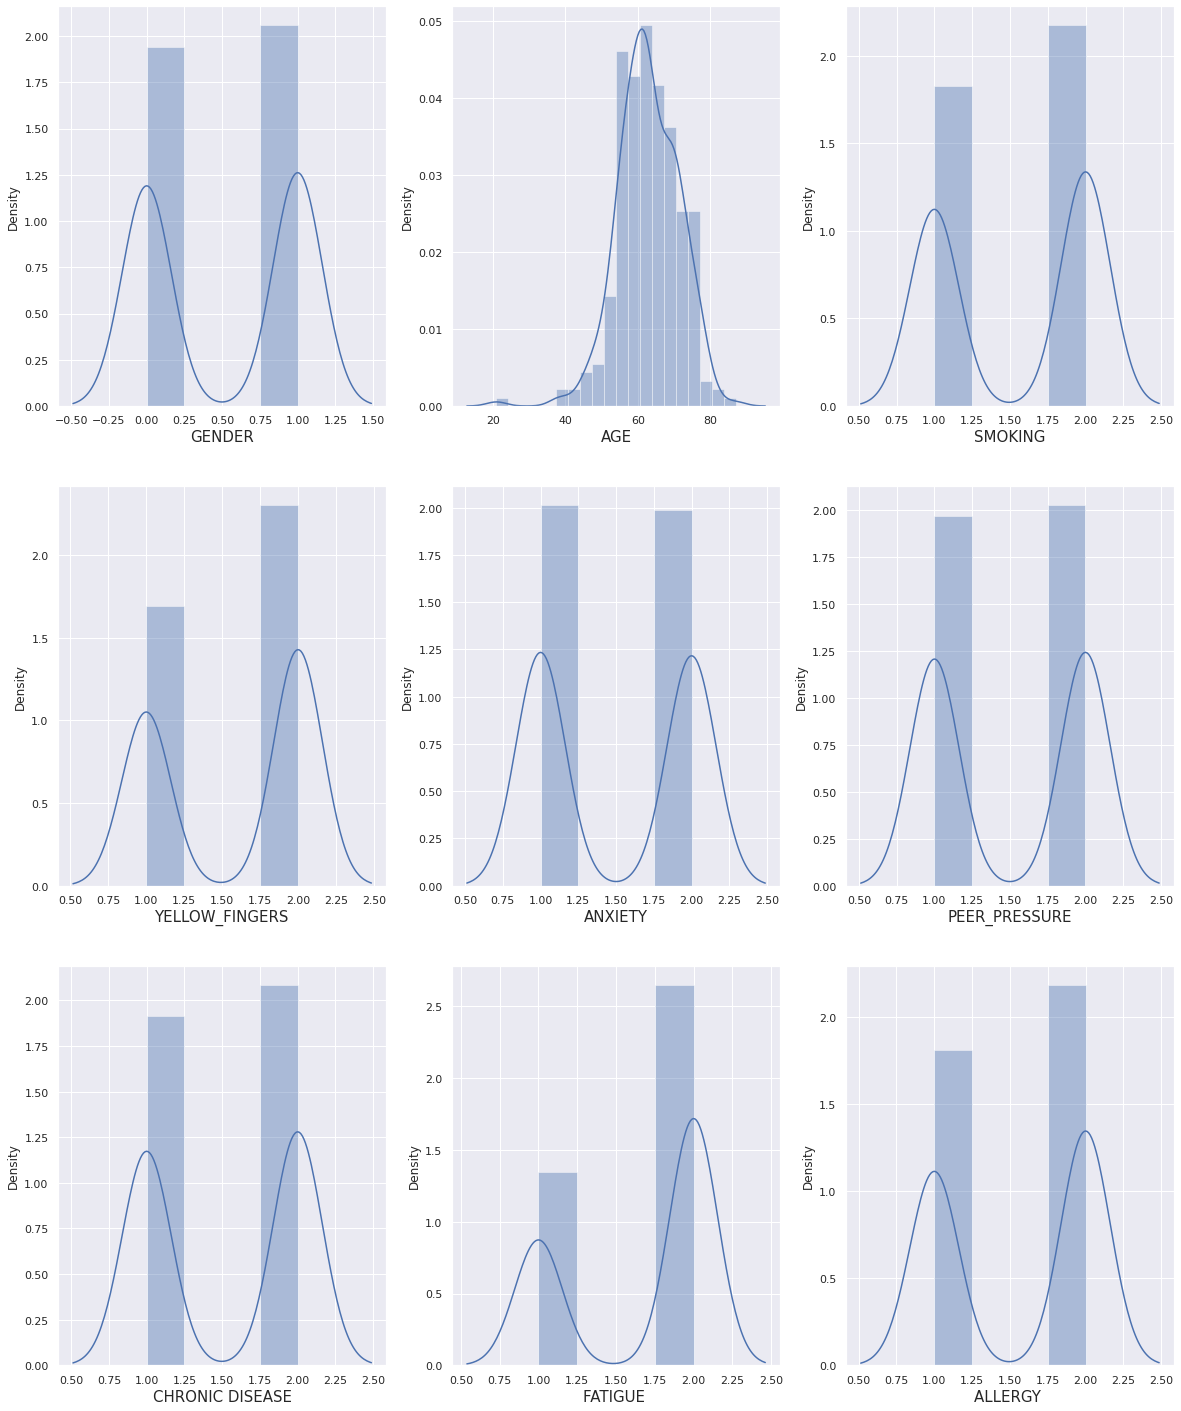

In [27]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [28]:
fig = px.imshow(df.corr(),aspect="auto",text_auto=True)
fig.show()

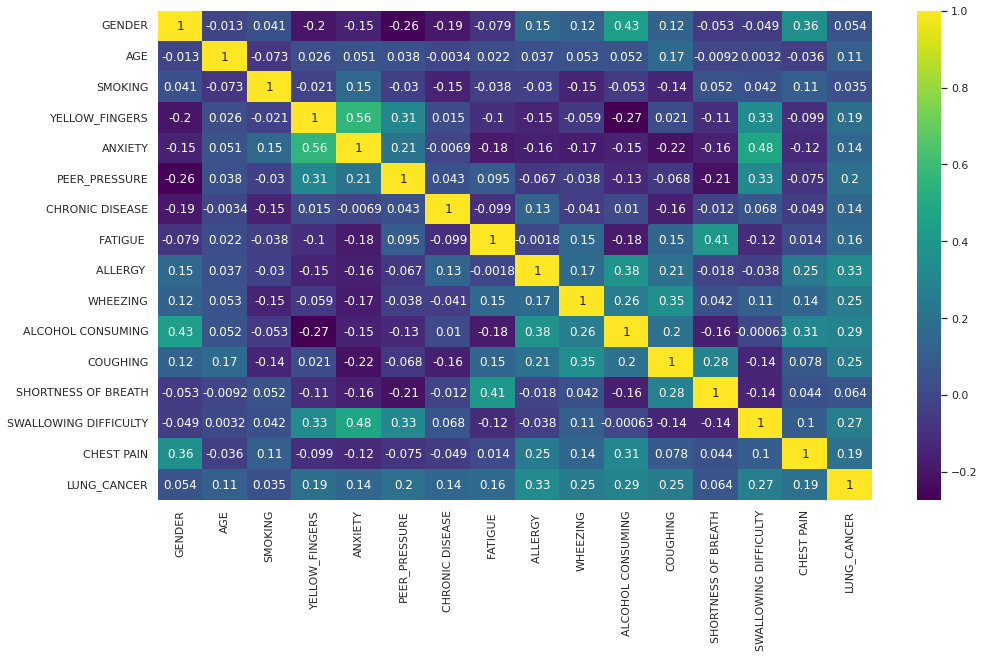

In [29]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

## MODEL PREPARATION

#### Splitting the data into training and test datasets

Here, we are trying to predict whether the patient has Lung Cancer or not using the given data. Hence, LUNG_CANCER will be the y label and rest of the data will be the X or the input data.

In [30]:
X = df.drop(columns=['LUNG_CANCER'],axis=1)
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [31]:
y = df['LUNG_CANCER']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [32]:
# Adding randomized samples to the data as the data is imbalanced
over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((476, 15), (476,))

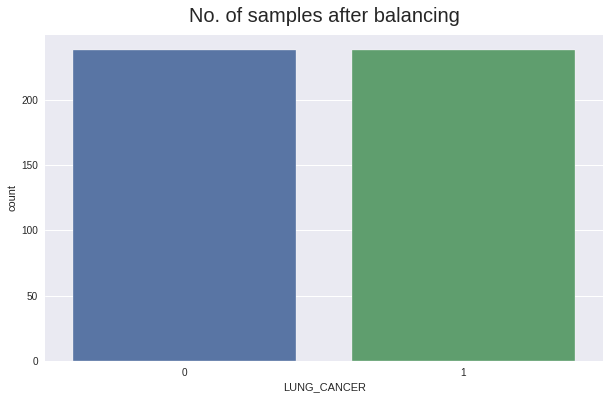

In [33]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_train_res)
plt.show()

In [34]:
# separating into train and testing
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,y_train.shape)
print("Shape of Y_test  is " ,y_test.shape)

Shape of X_train is  (220, 15)
Shape of X_test  is  (56, 15)
Shape of Y_train is  (220,)
Shape of Y_test  is  (56,)


In [35]:
print(y_train.value_counts())
print(y_test.value_counts())

1    190
0     30
Name: LUNG_CANCER, dtype: int64
1    48
0     8
Name: LUNG_CANCER, dtype: int64


#### Feature Scalilng

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred_lr)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.9318181818181818
Test Accuracy of Logistic Regression Model is 0.8928571428571429


In [38]:
confusion_matrix(y_test, y_pred_lr)

array([[ 4,  4],
       [ 2, 46]])

In [39]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.92      0.96      0.94        48

    accuracy                           0.89        56
   macro avg       0.79      0.73      0.76        56
weighted avg       0.88      0.89      0.89        56



In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred_knn)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.9045454545454545
Test Accuracy of KNN Model is 0.8928571428571429


In [41]:
confusion_matrix(y_test, y_pred_knn)

array([[ 3,  5],
       [ 1, 47]])

In [42]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.90      0.98      0.94        48

    accuracy                           0.89        56
   macro avg       0.83      0.68      0.72        56
weighted avg       0.88      0.89      0.88        56



In [43]:
xgb = XGBClassifier(booster = 'gblinear', learning_rate = 1, n_estimators = 10)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred_xgb)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

Training Accuracy of XGB Model is 0.8636363636363636
Test Accuracy of XGB Model is 0.8571428571428571


In [44]:
confusion_matrix(y_test, y_pred_xgb)

array([[ 0,  8],
       [ 0, 48]])

In [45]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      1.00      0.92        48

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred_dtc)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 0.9954545454545455
Test Accuracy of Decision Tree Model is 0.9285714285714286


In [47]:
confusion_matrix(y_test, y_pred_dtc)

array([[ 7,  1],
       [ 3, 45]])

In [48]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.98      0.94      0.96        48

    accuracy                           0.93        56
   macro avg       0.84      0.91      0.87        56
weighted avg       0.94      0.93      0.93        56



In [49]:
models = ['Logistic Regression', 'KNN','XgBoost','Decision Tree']
scores = [lr_test_acc, knn_test_acc, xgb_test_acc, dtc_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree,0.928571
0,Logistic Regression,0.892857
1,KNN,0.892857
2,XgBoost,0.857143


In [50]:
fig = px.histogram(models, x = 'Model', y = 'Score',
             height=500)
fig.show()

Decision Tree gives us the best result so we will save this model for production

In [51]:
import gradio as gr

In [52]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [53]:
def lung_cancer(GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY,
       PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING,
       ALCOHOL_CONSUMING, COUGHING, SHORTNESS_OF_BREATH,
       SWALLOWING_DIFFICULTY, CHEST_PAIN):
#turning the arguments into a numpy array  

    z = np.array([GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY,
       PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING,
       ALCOHOL_CONSUMING, COUGHING, SHORTNESS_OF_BREATH,
       SWALLOWING_DIFFICULTY, CHEST_PAIN])

    prediction = dtc.predict(z.reshape(1, -1))

    return prediction

In [54]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=lung_cancer, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number','number','number'], outputs=outputs,description="This is a lung cancer model")

In [ ]:
app.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://33267.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
